# 0 - Imports

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Pycaret
import pycaret
from pycaret.classification import *

# MLFlow
import mlflow
import mlflow.sklearn

# Utilidades
import sys
sys.path.append("..\..")


# 1- Cargar datos

In [2]:
X_train  = pd.read_parquet("../../data/modifications/TfidfVectorizer/X_train.parquet")
Y_train  = pd.read_parquet("../../data/modifications/TfidfVectorizer/Y_train.parquet")

In [3]:
# Juntar dataset para pycaret
df = X_train.copy()
df["target"] = Y_train["target"]
df

,0,1,2,3,4,5,6,7,8,9,...,17673,17674,17675,17676,17677,17678,17679,17680,17681,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.477564,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# 2 - Elección Pycaret

In [6]:
df_py = setup(
    data = df,                          # El conjunto de datos en el que se realizará el modelado.
    target = 'target',                  # El nombre de la columna que se desea predecir.
    train_size = 0.7,                   # Proporción del conjunto para entrenamiento. Por defecto es 0.7.
    preprocess = False,                 # Preprocesamiento automático del conjunto de datos. Por defecto es True.
    normalize = False,                  # Normalizar el conjunto usando el método Z-score. Por defecto es False.
    transformation = False,             # Aplicar transformación logarítmica. Por defecto es False.
    remove_multicollinearity = False,   # Eliminar características con alta multicolinealidad. Por defecto es False.
    multicollinearity_threshold = 0.9,  # Umbral de multicolinealidad. Por defecto es 0.9.
    pca = False,                        # Aplicar Análisis de Componentes Principales. Por defecto es False.
    pca_components = None,              # Número o proporción de componentes PCA. Por defecto es None.
    ignore_features = None,             # Lista de características a ignorar. Por defecto es None.
    session_id = 123,                   # Un número aleatorio semilla para reproducibilidad en todos los objetos del modelo.
    log_experiment = True,              # Registra en MLFlow
    experiment_name = 'pycaret_1'       # Nombre del experimento para registro en MLflow
)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(7613, 17683)"
4,Transformed data shape,"(7613, 17683)"
5,Transformed train set shape,"(5329, 17683)"
6,Transformed test set shape,"(2284, 17683)"
7,Numeric features,17682


2023/10/25 12:46:02 INFO mlflow.tracking.fluent: Experiment with name 'pycaret_1' does not exist. Creating a new experiment.


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7932,0.8568,0.6140,0.8660,0.7177,0.5622,0.5834,12.5360
et,Extra Trees Classifier,0.7880,0.8355,0.6472,0.8222,0.7237,0.5557,0.5666,29.8000
ridge,Ridge Classifier,0.7868,0.0000,0.6555,0.8125,0.7249,0.5543,0.5633,4.3960
rf,Random Forest Classifier,0.7803,0.8381,0.6022,0.8412,0.7010,0.5351,0.5543,12.4940
svm,SVM - Linear Kernel,0.7774,0.0000,0.6777,0.7764,0.7232,0.5386,0.5426,4.7740
lightgbm,Light Gradient Boosting Machine,0.7596,0.8149,0.6231,0.7729,0.6897,0.4974,0.5051,2.4430
dt,Decision Tree Classifier,0.7390,0.7335,0.6847,0.7014,0.6924,0.4658,0.4665,19.6000
ada,Ada Boost Classifier,0.7318,0.7299,0.5048,0.7991,0.6171,0.4269,0.4545,8.0180
gbc,Gradient Boosting Classifier,0.7305,0.7840,0.4520,0.8517,0.5896,0.4163,0.4630,516.4710
lda,Linear Discriminant Analysis,0.6833,0.7261,0.7279,0.6190,0.6632,0.3694,0.3796,392.0120


In [8]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


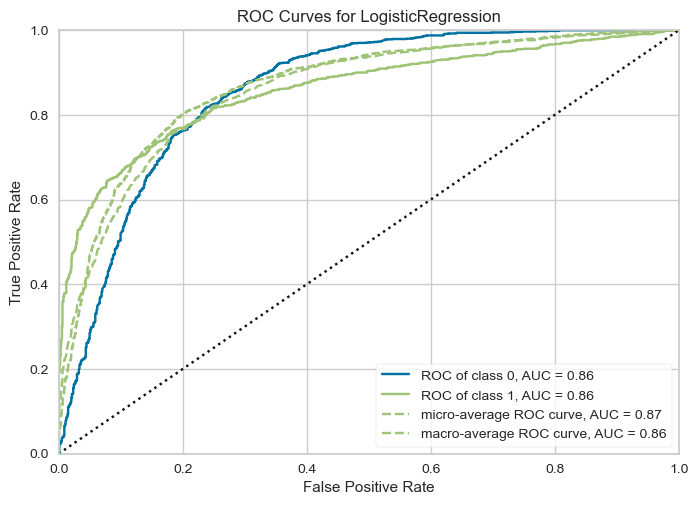

In [9]:
plot_model(best_model, plot = "auc")

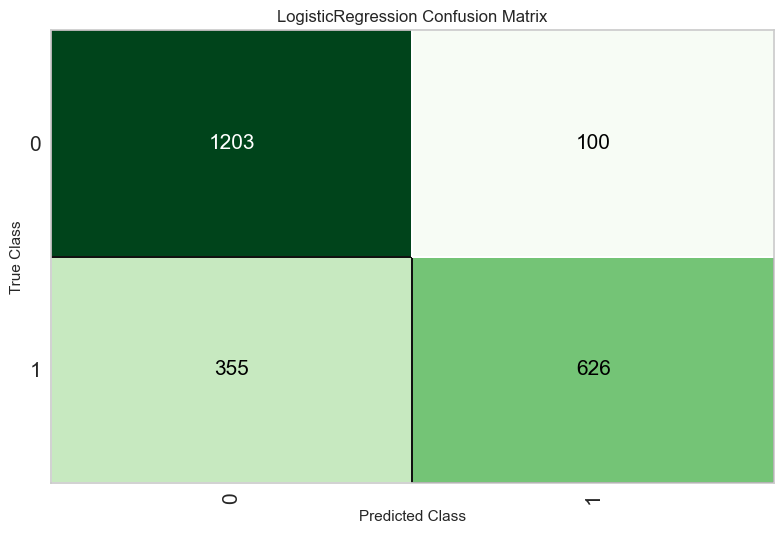

In [10]:
plot_model(best_model, plot = "confusion_matrix")

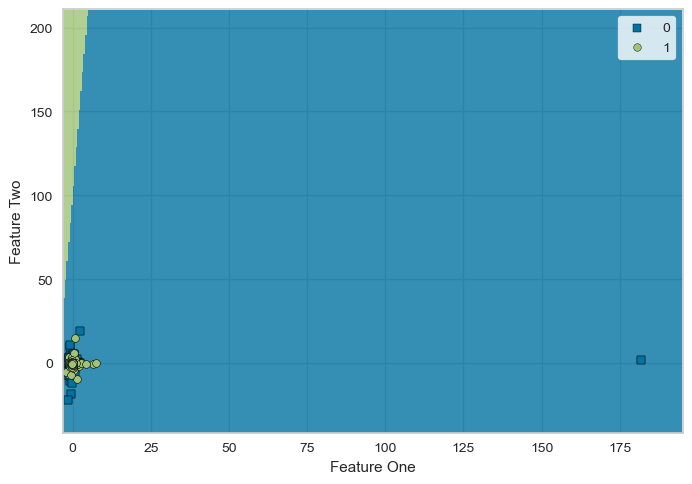

In [11]:
plot_model(best_model, plot = "boundary")

In [13]:
save_model(
    model = best_model,
    model_name= "../../models/1_pycaret")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=123,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 '../../models/1_pycaret.pkl')

# 3 - Logistic Regression

Viendo que a sido el modelo con mejor predicción vamos a optimizarlos.

In [2]:
# Algoritmo
from sklearn.linear_model import LogisticRegression

# Uso de Grid Search para selección del modelo
from sklearn.model_selection import GridSearchCV

In [3]:

X_train = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/X_train.parquet")
X_val = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/X_val.parquet")
Y_train = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/Y_train.parquet")
Y_val = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/Y_val.parquet")

## Grid Search

In [4]:
# Definiendo el modelo base
lr = LogisticRegression(max_iter=1000, random_state=123)

# Parámetros para Grid Search
param_grid = {
    'C': [0.001, 0.1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000]
}

"""
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 1500]
}
"""
# Creando el objeto Grid Search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)


In [5]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=123),
             n_jobs=-1, param_grid={'max_iter': [100]}, scoring='f1_weighted')

In [6]:
# Imprimir los resultados
print(grid_search.best_params_)

{'max_iter': 100}


In [7]:
print(grid_search.best_score_)

0.7883905059905968


In [8]:
print(grid_search.best_estimator_)

LogisticRegression(random_state=123)


In [9]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 score:", mean_score, "-", "Parámetros:", params)

F1 score: 0.7883905059905968 - Parámetros: {'max_iter': 100}


### Muestra de resultados

#### Conjunto de entrenamiento (Train)

In [10]:
# Seleccionamos el mejor modelo
lr_best = grid_search.best_estimator_

In [11]:
# Predecimos con el conjunto de datos de entrenamiento
y_train_pred = lr_best.predict(X_train)

Precisión: 0.9630281690140845
Recall: 0.7870503597122303
Accuracy: 0.8955339205686911
F1 score: 0.8661916072842439
AUC: 0.8821461497829642


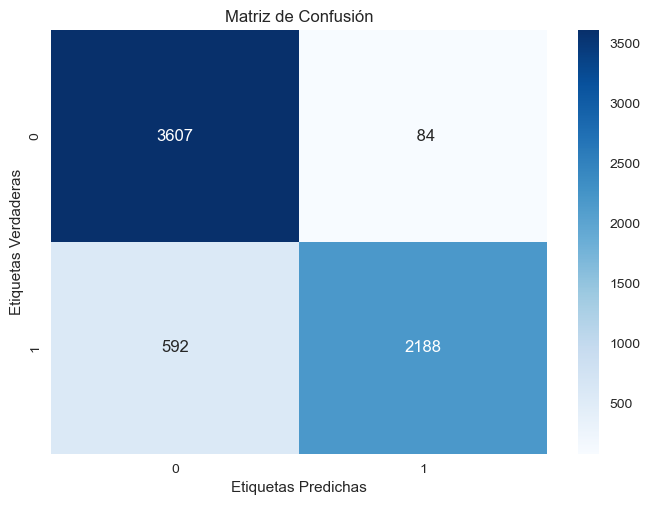

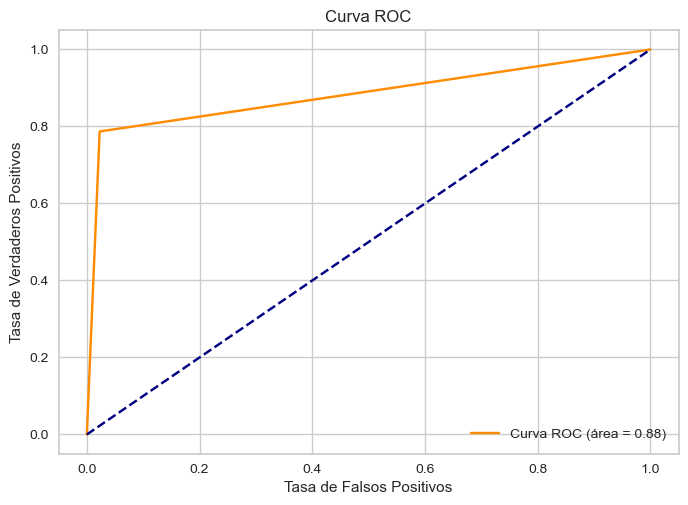

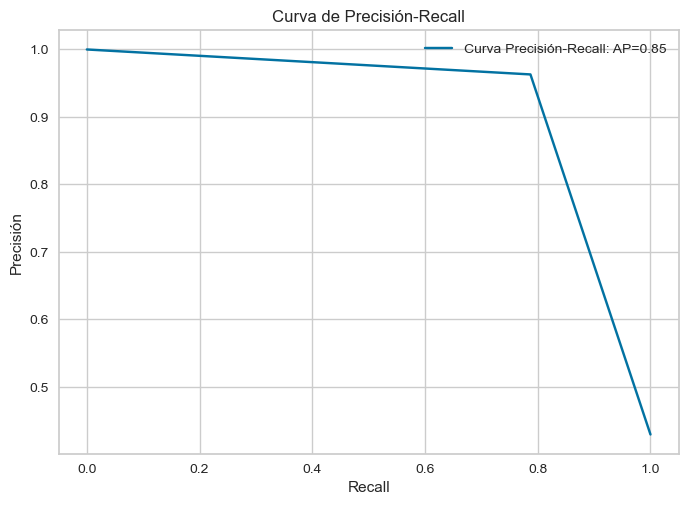

In [23]:
from package_utilities import evaluate_model
train_precision, train_recall, train_accuracy, train_f1, train_auc, train_matriz_confusion, train_curva_roc, train_curva_precision_recall =  evaluate_model(y_train_pred, Y_train)

#### Conjunto de Validación (Val)

In [14]:
# Predecimos con el conjunto de datos de entrenamiento
y_val_pred = lr_best.predict(X_val)

Precisión: 0.8406593406593407
Recall: 0.6232179226069247
Accuracy: 0.787215411558669
F1 score: 0.7157894736842104
AUC: 0.7670621103049984


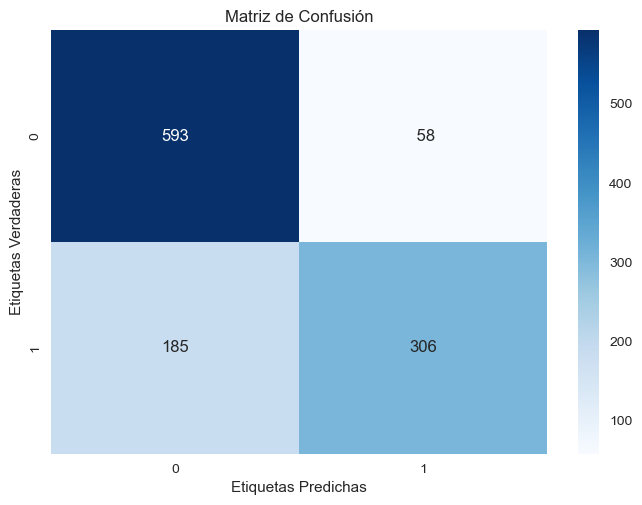

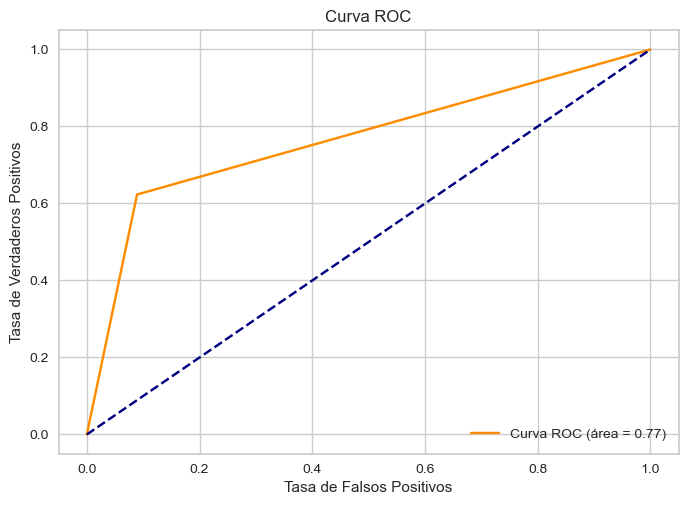

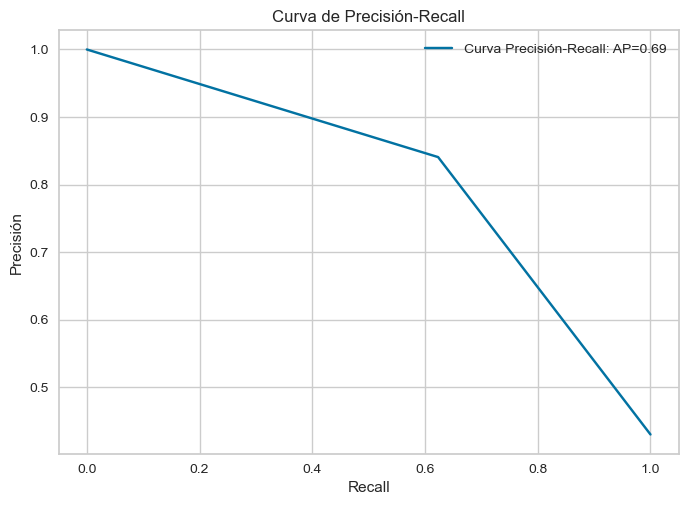

In [16]:
val_precision, val_recall, val_accuracy, val_f1, val_auc, val_matriz_confusion, val_curva_roc, val_curva_precision_recall =  evaluate_model(y_val_pred, Y_val)

### Comparación Métricas

In [24]:
train_precision

0.9630281690140845

In [29]:
col = ["Precisión", "Recall", "Accuracy", "F1 score", "AUC"]
df_metricas = pd.DataFrame(columns=col)
df_metricas.loc["Train"] = [train_precision, train_recall, train_accuracy, train_f1, train_auc]
df_metricas.loc["Validation"] = [val_precision, val_recall, val_accuracy, val_f1, val_auc]
df_metricas

,Precisión,Recall,Accuracy,F1 score,AUC
Train,0.963028,0.787050,0.895534,0.866192,0.882146
Validation,0.840659,0.623218,0.787215,0.715789,0.767062


## Guardar Modelo

### MLFlow

### Guardado "físico"

In [ ]:
from joblib import dump
# dump(lr_best, '../../models/logistic_regresor.joblib')